# **Cape Town Airbnb Analysis Report**

### **Student Name:** Richard Baah Nkansah

### **Student ID:** S2424536
### **Submission Date**: 5/12/2024





## Abstract

This report analyzes the CapeTown Airbnb Dataset, with a focusing on data cleaning, wrangling, and exploratory analysis. This report aims to prepare the dataset for further analysis and proposes three potential research questions based on findings from the data exploration. Dataset merging, dealing with missing values and duplicates and investigating correlations between important variables are all key operations.

## 1 Introduction

CapeTown Airbnb Dataset comprises information on the various listings on the Airbnb platform. Analysing this data would provide insight in market trend, house accessibility and neighbourhood characteristics. This report seeks to prepare the dataset for further analysis and proposes three research questions based on data exploration outcomes. The various stages involves data cleaning, wrangling, and exploratory data analysis.

##2 Overview of the CapeTown Airbnb Dataset

The public Airbnb dataset from the Inside Airbnb Project consists of two CSV files, airbnb1 and airbnb2, each containing CapeTown Airbub listings information summarised in the Table 3.1.


### Table 2.1 Airbnb Data Categories

| **Category**            | **Details**                                           |
|--------------------------|------------------------------------------------------|
| **Listing details**      | Name, price, property type, and room type            |
| **Host information**     | Host ID, name, response rates, and total listings    |
| **Availability and reviews** | Availability days, review scores, and review counts |




## 3 Methodology



### 3.1 Data Loading and Exploration

The Airbnb datasets were loaded into Google Colaboratory using the **pd.read_csv** function in Pandas. To understand the structure of the dataset, the first few rows, columns, and dimensions were checked.

###Table 3.1:  Airbnb Dataset structure

| **Dataset**   | **Row Number**   | **Column Number** | **Shape**         |
|-----------|--------------|---------------|---------------|
| airbnb1   | 23564 | 62     | (23564, 62) |
| airbnb2   | 23564| 21    | (23564, 21) |


The two datasets had a number of common columns. For easy working with the dataset, the datasets were merged into one using the **pd.merge function** in pandas, which took care of the common columns. The merged dataset was stored as **merged_airbnb** and had a shape of (23564, 75). Next, the summary of the dataset was generated to explore the data types, uniques values and number of missing values in each column.


To begin with, the required libraries were imported to enable working with the data

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Using the Pandas library, the Airbnb datasets were loaded into Google Colaboratory.

In [ ]:
# Load data
airbnb1 = pd.read_csv('/content/drive/MyDrive/airbnb_1.csv')
airbnb2 = pd.read_csv('/content/drive/MyDrive/airbnb_2.csv')

The first few rows of the datasets (airbnb1 and airbnb2) were displayed to familiarize with data

In [ ]:
# Display first few rows
airbnb1.head()



,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,availability_60,availability_90,availability_365,calendar_last_scraped,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,3191.0,https://www.airbnb.com/rooms/3191,2.024060e+13,29/06/2024,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,0,30,305,29/06/2024,NaN,t,1,1,0,0
1,298622.0,https://www.airbnb.com/rooms/298622,2.024060e+13,29/06/2024,city scrape,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","The area is very beautiful, with sea and mount...",https://a0.muscache.com/pictures/3547300/40a29...,1539169,...,34,64,286,29/06/2024,NaN,f,1,1,0,0
2,357793.0,https://www.airbnb.com/rooms/357793,2.024060e+13,30/06/2024,city scrape,CityChic @ the Piazza meets Table Mountain,"Superb 2 bedroom penthouse, with balcony, in t...",NaN,https://a0.muscache.com/pictures/272b7efe-6924...,1802190,...,58,88,143,30/06/2024,NaN,f,1,1,0,0
3,357993.0,https://www.airbnb.com/rooms/357993,2.024060e+13,29/06/2024,city scrape,Beach View Studio with Balcony Walkout,Camps Bay Guesthouse Studio is an ultra-modern...,The studio is situated in the extremely popula...,https://a0.muscache.com/pictures/c222b47a-fab5...,1811942,...,36,66,199,29/06/2024,NaN,f,3,3,0,0
4,15007.0,https://www.airbnb.com/rooms/15007,2.024060e+13,29/06/2024,city scrape,Blaauwberg House (now with inverter),Welcome to our self-catering beach-front famil...,"Bloubergstrand is a lovely, cosy suburb near C...",https://a0.muscache.com/pictures/3b654aa4-248e...,59072,...,51,74,147,29/06/2024,NaN,f,4,4,0,0


In [ ]:
print("\nFirst few rows of airbnb2:")
airbnb2.head()


First few rows of airbnb2:


,id,listing_url,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191.0,https://www.airbnb.com/rooms/3191,79,6,1,31/05/2013,18/06/2024,4.82,4.84,4.70,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,298622.0,https://www.airbnb.com/rooms/298622,71,1,0,09/03/2012,17/01/2024,4.94,4.97,4.89,...,4.99,4.87,4.89,NaN,f,1,1,0,0,0.47
2,357793.0,https://www.airbnb.com/rooms/357793,224,16,0,23/07/2012,12/04/2024,4.76,4.87,4.82,...,4.79,4.73,4.83,NaN,f,1,1,0,0,1.54
3,357993.0,https://www.airbnb.com/rooms/357993,108,3,0,23/02/2014,08/02/2024,4.79,4.88,4.89,...,4.84,4.76,4.64,NaN,f,3,3,0,0,0.86
4,15007.0,https://www.airbnb.com/rooms/15007,46,2,0,15/12/2013,02/04/2024,4.83,4.91,4.85,...,4.96,4.93,4.85,NaN,f,4,4,0,0,0.36


To understand the structure of the datasets, the shapes and column names of each were checked using the **.shape** function in Pandas.

In [ ]:
# Check the shape of datasets
print("Shape of airbnb1:", airbnb1.shape)
print("Shape of airbnb2:", airbnb2.shape)

Shape of airbnb1: (23564, 62)
Shape of airbnb2: (23564, 21)


In [ ]:
# Column names
print("Columns in airbnb1:", airbnb1.columns)


Columns in airbnb1: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_

In [ ]:
print("Columns in airbnb2:", airbnb2.columns)

Columns in airbnb2: Index(['id', 'listing_url', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


Both datasets were merged, and the shape was checked. Common columns in both datasets were addressed by working with only one of these columns to prevent duplication. This process is handled by the **pd.merge function** in Pandas.

23564 rows and 75 columns were obtained after merging.

In [ ]:
# Merge datasets on the 'id' column
merged_airbnb = pd.merge(airbnb1,airbnb2)

merged_airbnb.shape


(23564, 75)

In [ ]:
#View the first few rows of the merged Airbnb dataset
merged_airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3191.0,https://www.airbnb.com/rooms/3191,2.024060e+13,29/06/2024,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,31/05/2013,18/06/2024,4.82,4.84,4.70,4.97,4.96,4.77,4.81,0.59
1,298622.0,https://www.airbnb.com/rooms/298622,2.024060e+13,29/06/2024,city scrape,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","The area is very beautiful, with sea and mount...",https://a0.muscache.com/pictures/3547300/40a29...,1539169,...,09/03/2012,17/01/2024,4.94,4.97,4.89,4.97,4.99,4.87,4.89,0.47
2,357793.0,https://www.airbnb.com/rooms/357793,2.024060e+13,30/06/2024,city scrape,CityChic @ the Piazza meets Table Mountain,"Superb 2 bedroom penthouse, with balcony, in t...",NaN,https://a0.muscache.com/pictures/272b7efe-6924...,1802190,...,23/07/2012,12/04/2024,4.76,4.87,4.82,4.78,4.79,4.73,4.83,1.54
3,357993.0,https://www.airbnb.com/rooms/357993,2.024060e+13,29/06/2024,city scrape,Beach View Studio with Balcony Walkout,Camps Bay Guesthouse Studio is an ultra-modern...,The studio is situated in the extremely popula...,https://a0.muscache.com/pictures/c222b47a-fab5...,1811942,...,23/02/2014,08/02/2024,4.79,4.88,4.89,4.93,4.84,4.76,4.64,0.86
4,15007.0,https://www.airbnb.com/rooms/15007,2.024060e+13,29/06/2024,city scrape,Blaauwberg House (now with inverter),Welcome to our self-catering beach-front famil...,"Bloubergstrand is a lovely, cosy suburb near C...",https://a0.muscache.com/pictures/3b654aa4-248e...,59072,...,15/12/2013,02/04/2024,4.83,4.91,4.85,4.98,4.96,4.93,4.85,0.36


The summary of the merged Airbnb dataset was generated to explore the data types, uniques values and number of missing values in each column.

In [ ]:
#General Summary of the merged Airbnb dataset
print("### General Summary ###")
merged_airbnb.info()

### General Summary ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23564 non-null  float64
 1   listing_url                                   23564 non-null  object 
 2   scrape_id                                     23564 non-null  float64
 3   last_scraped                                  23564 non-null  object 
 4   source                                        23564 non-null  object 
 5   name                                          23563 non-null  object 
 6   description                                   23161 non-null  object 
 7   neighborhood_overview                         13906 non-null  object 
 8   picture_url                                   23564 non-null  object 
 9   host_id                              

## 3.2 Data Cleaning and Wrangling
### Variable selection
21 variables of interest were selected as the main focus for this report. Variables selection were based on their relevance to price, reviews, availability, and host information. In addressing variables with excessive missing data, the percentage of missing values for each column was calculated, and columns such as host_neighbourhood, neighbourhood_group_cleansed, calendar_updated, and license with 50% missing data were dropped.

### Detecting and Handling Missing Data
Columns with less than 50% missing data were imputed using the **median** for numerical columns and **mode** for the categorical columns. The imputation method unlike dropping rows with missing values was chosen to retain data integrity and avoid loss of valuable information.

### Duplicates and Data Types
The dataset's duplicated number was first identified using the .duplicated().sum() Pandas library function. To deal with these identified number of duplicates, the drop_duplicates() was used to drop duplicates in the data.

The price was converted to numeric by removing any present special characters.


Columns with 50% missing data were identified and dropped

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (merged_airbnb.isnull().sum() / len(merged_airbnb)) * 100

# Define a threshold for dropping columns (e.g., 50%)
threshold = 50

# Drop columns exceeding the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index
cleaned_data = merged_airbnb.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop.tolist()}")
print("Shape of cleaned data:", cleaned_data.shape)

Dropped columns: ['host_neighbourhood', 'neighbourhood_group_cleansed', 'calendar_updated', 'license']
Shape of cleaned data: (23564, 71)


21 columns of interest were selected as the main focus of this report based on their relevance to price, reviews, availability and host information

In [ ]:
# Selection of variables of interest
selected_columns = ['id','host_name', 'neighbourhood', 'host_response_rate','room_type', 'accommodates',
                    'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
                    'minimum_nights','availability_365',
                    'number_of_reviews','review_scores_rating','review_scores_location','instant_bookable',
                    'host_is_superhost', 'host_identity_verified',
                    'property_type', 'host_response_time']

selected_data = cleaned_data[selected_columns]
selected_data.shape   # check the shape of the selected variables of interest

(23564, 21)

The price was converted to numeric by removing any present special characters.

In [ ]:
#Convert Price to numerical by taking of special characters
selected_data['price']=selected_data['price'].str.replace('$','').str.replace(',','').astype(float)
selected_data['price'].head()

<ipython-input-18-c079612dcba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['price']=selected_data['price'].str.replace('$','').str.replace(',','').astype(float)


,price
0,635.0
1,1500.0
2,2000.0
3,1700.0
4,3102.0


The total null values existing in the selected data were identified for further processing

In [ ]:
#count the number of null values
selected_data.isnull().sum()

,0
id,0
host_name,0
neighbourhood,9658
host_response_rate,6579
room_type,0
accommodates,0
bathrooms,3349
bedrooms,578
beds,3361
amenities,0


 Columns with null values identified were imputed using the median for numerical columns and mode for the categorical columns. These was to prevent loss of valuable information in the data as opposed to dropping rows with null values.

In [ ]:
# Define columns by type
numeric_columns = selected_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = selected_data.select_dtypes(include=['object']).columns

# Handle missing values for numeric columns
for col in numeric_columns:

  selected_data[col].fillna(selected_data[col].median(),inplace=True)


# Handle missing values for categorical columns
for col in categorical_columns:
  selected_data[col].fillna(selected_data[col].mode()[0], inplace=True)


# Check if missing values are handled
missing_values_summary = selected_data.isnull().sum()
print(missing_values_summary)

<ipython-input-20-e10071764d8e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_data[col].fillna(selected_data[col].median(),inplace=True)
<ipython-input-20-e10071764d8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col].fillna(selected_data[col].median(),inplace=True)
<ipython-input-20-e10071764d8e>:13: FutureWarni

id                        0
host_name                 0
neighbourhood             0
host_response_rate        0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
availability_365          0
number_of_reviews         0
review_scores_rating      0
review_scores_location    0
instant_bookable          0
host_is_superhost         0
host_identity_verified    0
property_type             0
host_response_time        0
dtype: int64


Existing duplicates were identified and removed

In [ ]:
# Check for duplicates and remove them
print("Number of duplicates before removal:", selected_data.duplicated().sum())

Number of duplicates before removal: 28


In [ ]:
#Remove duplicates
selected_data.drop_duplicates(inplace=True)

<ipython-input-22-07bc530eb8a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.drop_duplicates(inplace=True)


In [ ]:
#check for duplicates after removal
print("Number of duplicates after removal:", selected_data.duplicated().sum())

Number of duplicates after removal: 0


The shape was checked to cross-check its structure

In [ ]:
#Check the shape of the dataset
selected_data.shape

(23536, 21)

## 3.3 Exploratory Data Analysis
### Summary Statistics
The numerical columns in the selected data were summarized using measures such as the mean, median, min, max, and standard deviation to understand their various tendencies and spread. Observations made from the generated statistical summaries are summarised in Table 3.2.

### Table 3.2 Summary Statistics of Key Numeric Columns

| **Column**             | **Mean**   | **Median (50%)** | **Standard Deviation (std)** | **Min**  | **Max**      | **Key Observations**                                                                 |
|-------------------------|------------|-------------------|------------------------------|----------|--------------|-------------------------------------------------------------------------------------|
| **Accommodates**        | 3.78       | 3                 | 2.42                         | 1        | 16           | Most listings accommodate around 3–4 guests. The range shows variability in capacity. |
| **Bathrooms**           | 1.63       | 1                 | 1.21                         | 0        | 50           | A typical listing has 1 bathroom. The max value (50) might be a possible outlier or anomaly.       |
| **Bedrooms**            | 1.88       | 1                 | 1.49                         | 0        | 50           | Most listings have 1–2 bedrooms. A max of 50 suggests possible data issues or large properties. |
| **Beds**                | 2.14       | 2                 | 1.78                         | 0        | 70           | Listings typically offer 2 beds, with 70 beds being an extreme outlier.              |
| **Price**               | 2552.57    | 1250.50           | 8470.79                      | 160      | 999,538      | The price distribution is highly skewed with significant outliers at the high end.<br> A listing of price 999538 suggests a possible outlier or a luxurious property   |
| **Minimum Nights**      | 4.43       | 2                 | 16.78                        | 1        | 999          | Most properties have short minimum stays; 999 nights is likely an unusual listing <br>, which indicates the possibility of being an outlier or anomaly  |
| **Availability_365**    | 199.30     | 220               | 125.99                       | 0        | 365          | Many listings are available year-round, with 199 days being the average.             |
| **Number of Reviews**   | 23.81      | 6                 | 45.64                        | 0        | 756          | Many listings have only a few reviews while some have an exceptionally high number.       |
| **Review Scores Rating**| 4.81       | 4.88              | 3.09                         | 1        | 466          | Most listings are rated highly (close to 5). A max score of 466 is a possible outlier or anomaly.       |
| **Review Scores Location** | 4.83   | 4.91              | 0.31                         | 1        | 5            | The score nearing 5 shows that guests are highly satisfied with location.                |

---

### Observations:
- **High Satisfaction**: Review score for location indicates positive guest experiences.
- **Outliers and Data Quality**: Columns such as bathrooms, bedrooms, beds, prices, and ratings has extreme values, suggesting a possible data entry errors or outlier.



In [ ]:
# Generate summary statistics for numerical columns
numerical_summary = selected_data.describe()
print(numerical_summary)

                 id  accommodates     bathrooms      bedrooms          beds  \
count  2.353600e+04  23536.000000  23536.000000  23536.000000  23536.000000   
mean   4.572929e+17      3.780591      1.626232      1.881713      2.139021   
std    4.735792e+17      2.423970      1.213802      1.490237      1.775229   
min    3.191000e+03      1.000000      0.000000      0.000000      0.000000   
25%    2.844408e+07      2.000000      1.000000      1.000000      1.000000   
50%    5.132330e+17      3.000000      1.000000      1.000000      2.000000   
75%    9.491365e+17      5.000000      2.000000      2.000000      3.000000   
max    1.188910e+18     16.000000     50.000000     50.000000     70.000000   

               price  minimum_nights  availability_365  number_of_reviews  \
count   23536.000000    23536.000000      23536.000000       23536.000000   
mean     2552.566621        4.434398        199.298734          23.811948   
std      8470.793406       16.781064        125.997723   

### Distribution Analysis


**Histogram** for the key numerical columns was plotted to visualise their distribution by showing the frequency data points witin specific intervals. To identify potential outliers, **box plots** were generated to identity potential outliers existing in the key numerical columns.

#### Observations


*   A number of listings has unusually **high number of bathrooms, bedrooms, and beds** indicating a data error or large properties

*   Some listings have extremely high prices, such as 999,538, which might indicate a genuine luxury listing or a data error

*   A few listings have unusual days for minimal stay. A maximum value of 999 minimal stay might be a possible outlier.

*   A few listings have an unreasonable number of review ratings such as 466 which might indicate a possible outlier, manipulation or genuine guest eperiences




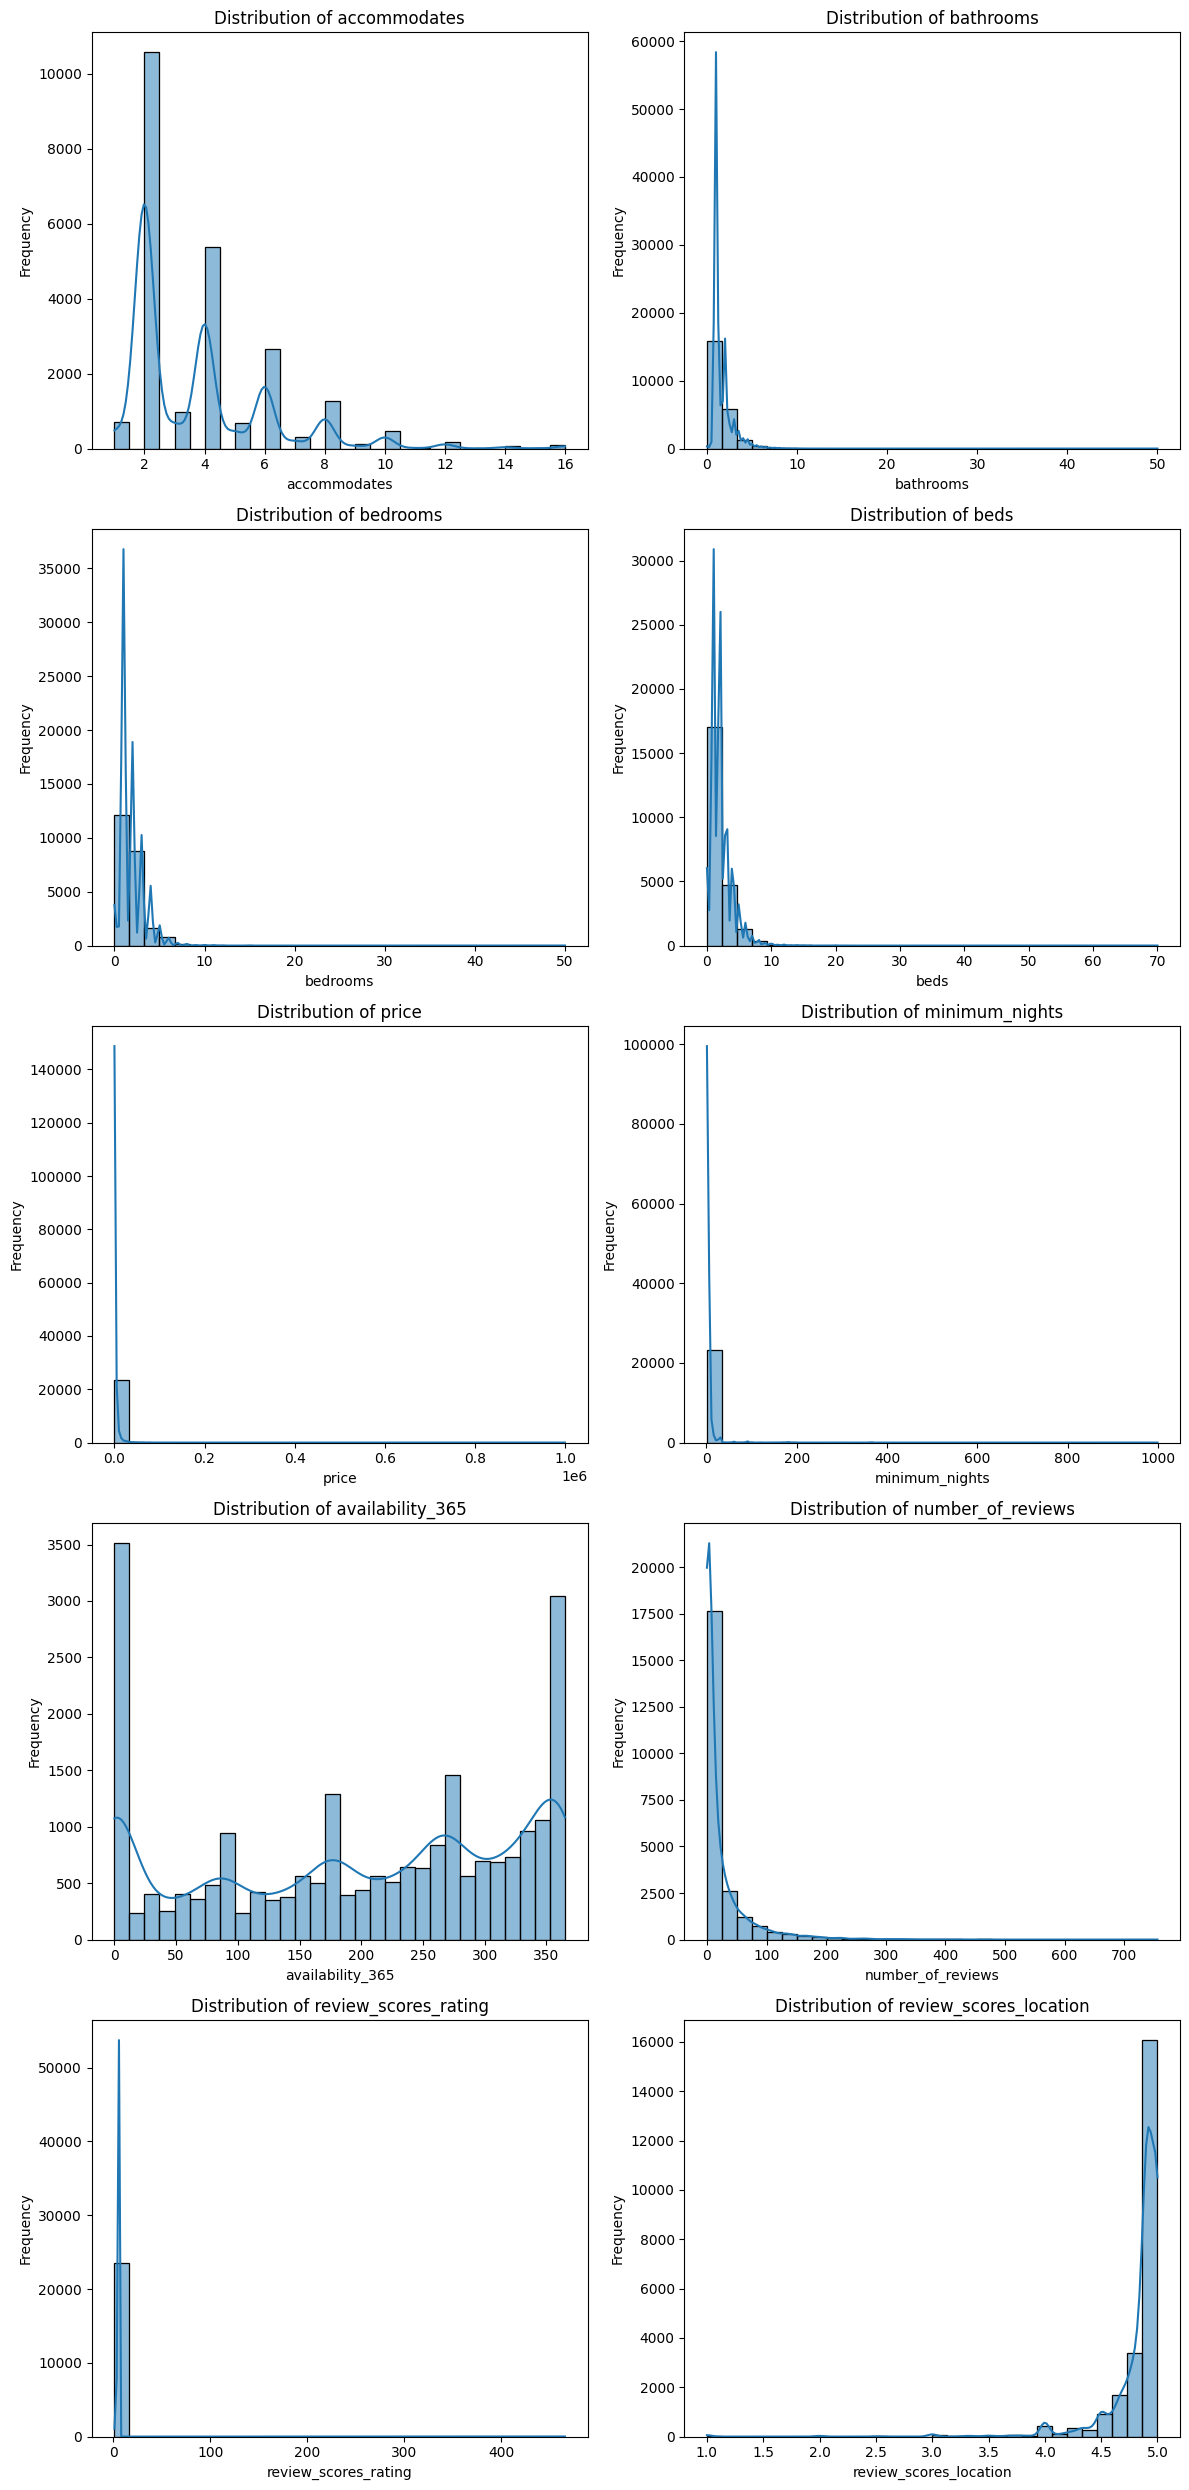

In [ ]:
# Loads the dataset
df = selected_data

# Numerical variables to plot
numerical_cols = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
    'minimum_nights', 'availability_365', 'number_of_reviews',
    'review_scores_rating', 'review_scores_location',
]


# Function to plot distributions for numerical variables
def plot_numerical_distributions(data, cols, cols_per_row=2):
    rows = (len(cols) + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(12, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Turn off unused subplots
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


# Plot numerical distributions side by side
plot_numerical_distributions(df, numerical_cols)

Box plottings for key numerical variables to detect outliers

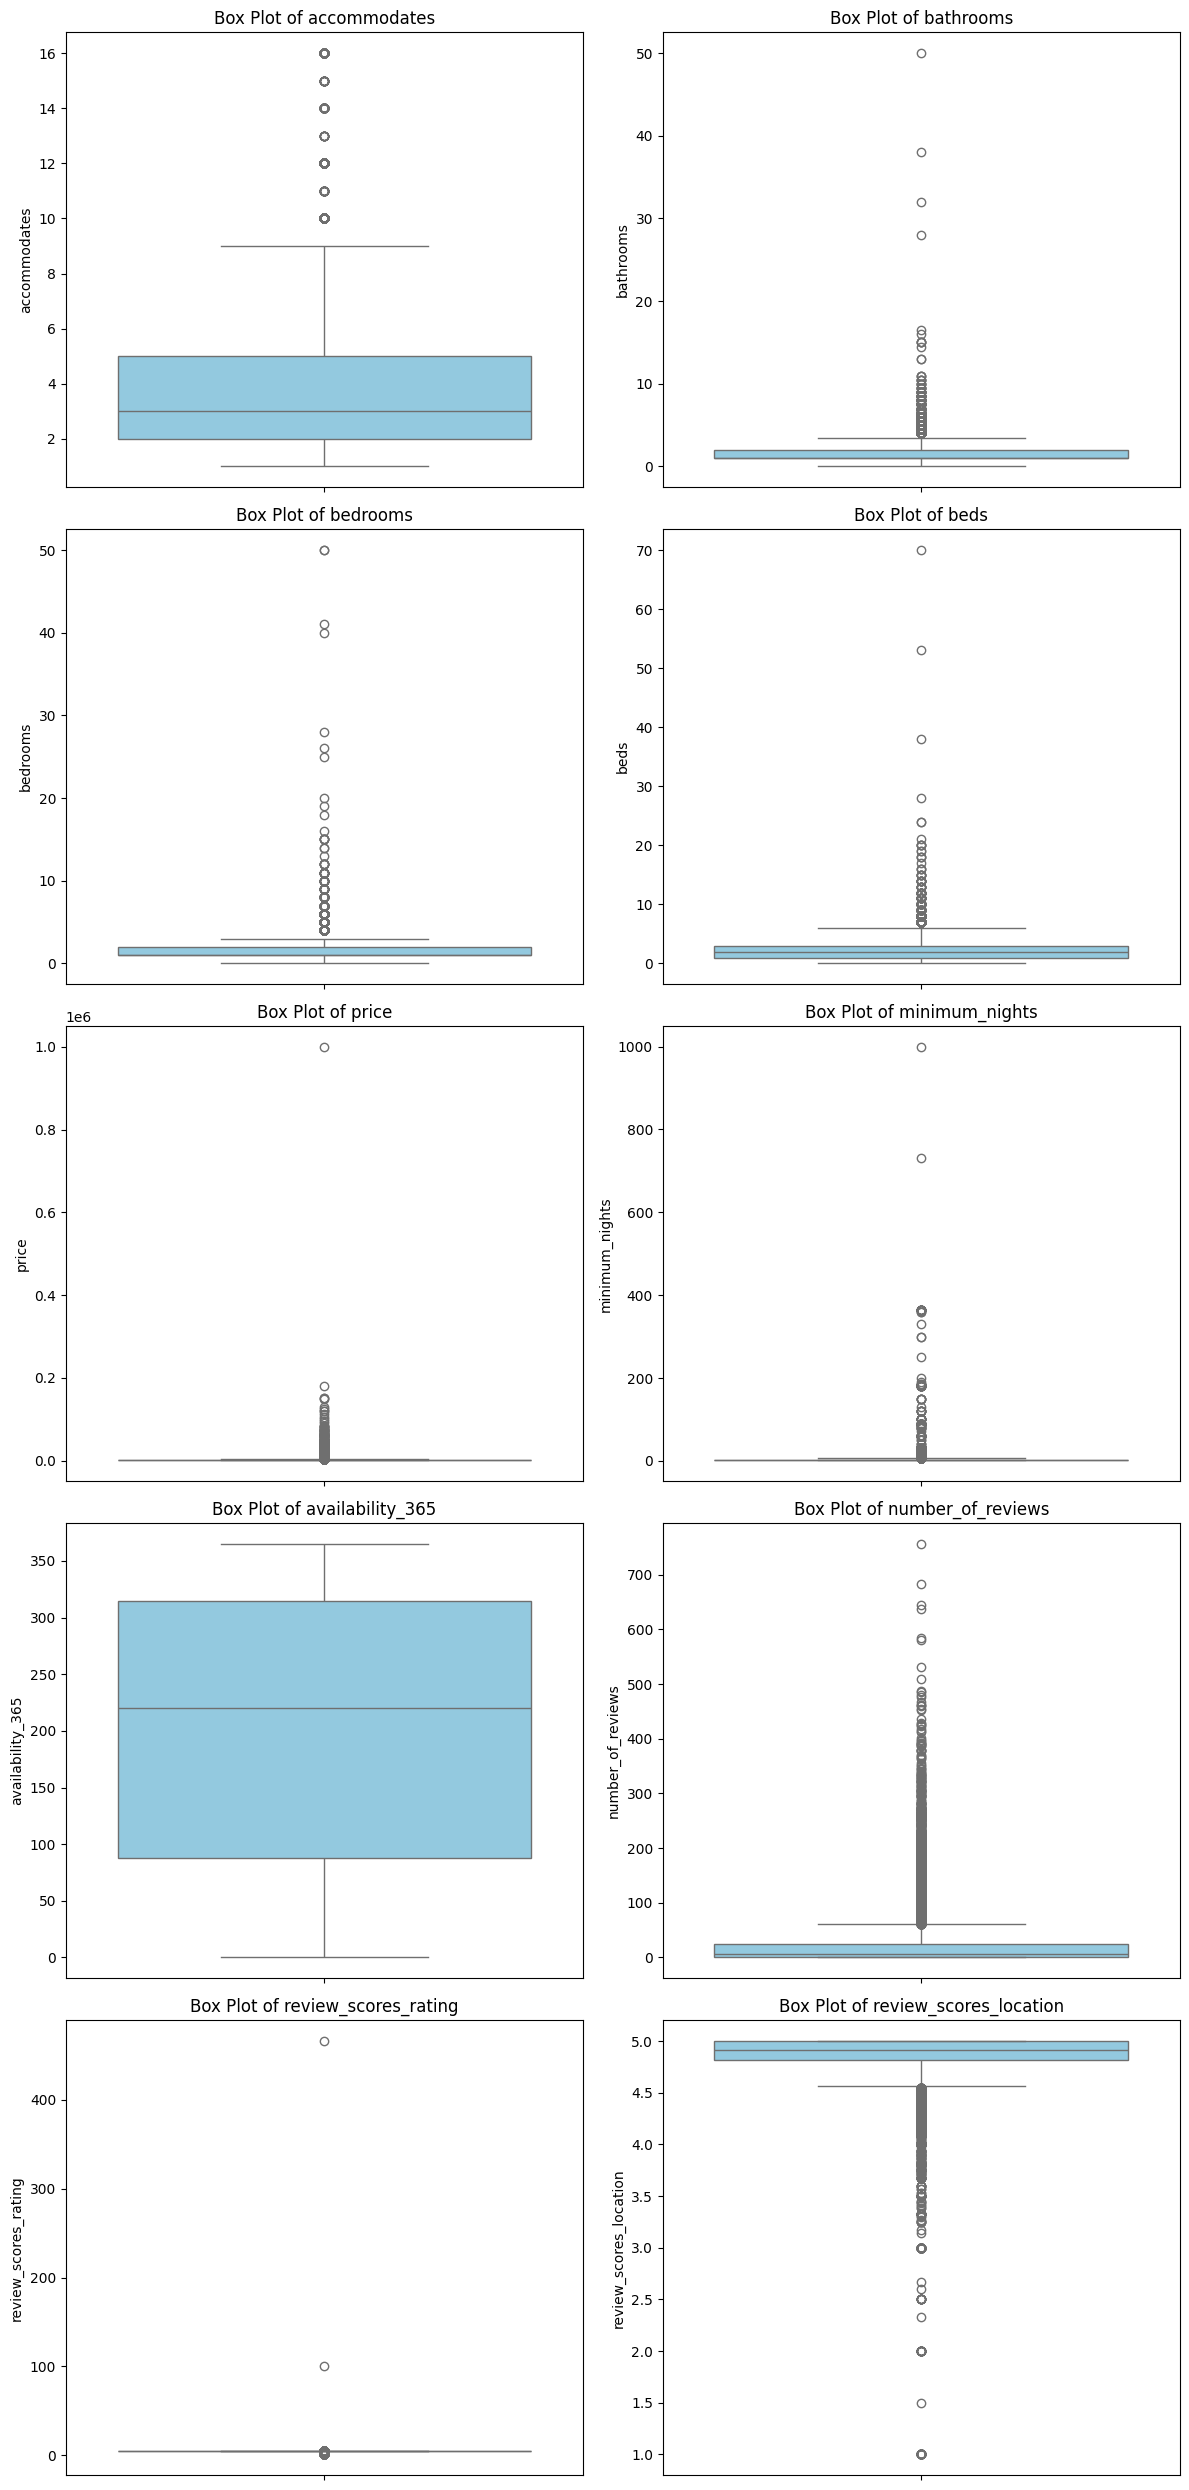

In [ ]:
# Loads the dataset
df = selected_data

# Numerical variables to plot
numerical_cols = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
    'minimum_nights', 'availability_365', 'number_of_reviews',
    'review_scores_rating', 'review_scores_location'
]

# Function to generate box plots for numerical variables
def plot_boxplots(data, cols, cols_per_row=2):
    rows = (len(cols) + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(12, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot(data=data, y=col, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_ylabel(col)
        axes[i].set_xlabel('')

    # Turn off unused subplots
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Generate box plots for numerical variables
plot_boxplots(df, numerical_cols)


### Relationships Between Variables




The relationship between the selected variables was visualized by making use of scatter plots, box plots, and correlation matrix. For scatter and box plots, relationships between two random variables among the selected variables of interest were considered.

Scatter plot was used to vvisualize the relationship between price and number of reviews, and box plot was used to visualize the relationship between price and room type.

Lastly, a correlation matrix was used to generate a broader view of the relationship between the selected numerical variable.

From the scatter plot visualization for price against the number of reviews, it was observed that the listings with lower prices have high number of reviews, while listings with extreme prices have zero number of reviews. Extreme prices for listings indicate a possible data error or a luxurious property not experienced by guests to give a review due to its high pricing.

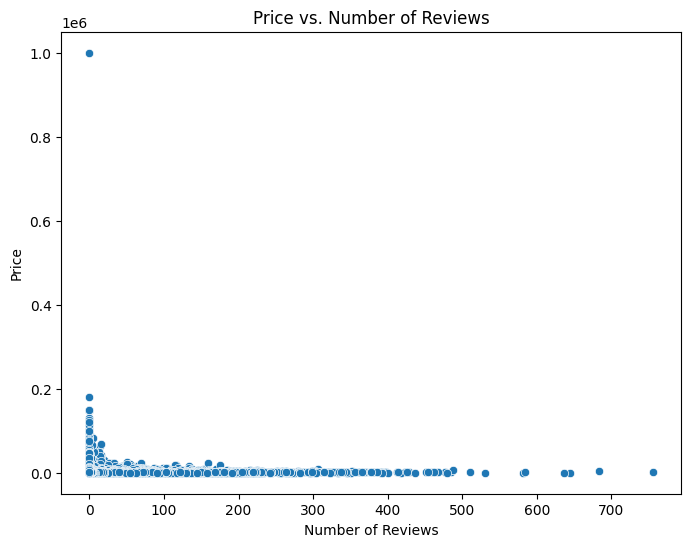

In [ ]:
# Scatterplot of 'price' vs. 'number_of_reviews'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=selected_data)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()


Observations from the box plot for price versus room type indicates that the type of room for the various listings influences the price. Entire home/apartment was ranked the highest, followed by private room, hotel rooms, and shared rooms ranking the last. Also, the virtualisation indicated a listing with a very high pricing, indicating an outlier of a luxury apartment. This listing was explored further for better understanding.

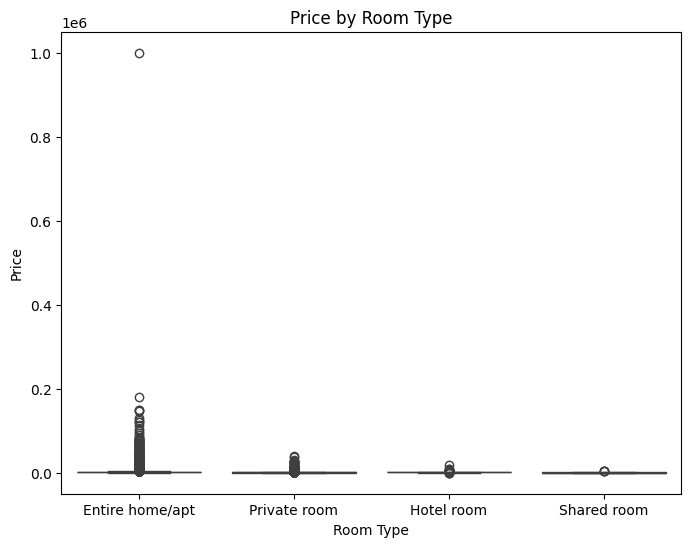

In [ ]:
# Box plot of 'price' by 'room_type'
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=selected_data)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

Further exploration of the listing with the extreme price showed that this listing is an entire luxury villa hence accounting for its extreme pricing and zero number of review due to lack of guest experiences to pass a review.

In [ ]:
# Find the index of the listing with the highest price
highest_price_index = selected_data['price'].idxmax()

# Get the name, room type, property type, and number of reviews of that listing
listing_name = cleaned_data.loc[highest_price_index, 'name']
room_type = selected_data.loc[highest_price_index, 'room_type']
property_type = selected_data.loc[highest_price_index, 'property_type']
number_of_reviews = selected_data.loc[highest_price_index, 'number_of_reviews']

# Print the results
print(f"Listing with highest price:")
print(f"Name: {listing_name}")
print(f"Room Type: {room_type}")
print(f"Property Type: {property_type}")
print(f"Number of Reviews: {number_of_reviews}")

Listing with highest price:
Name: View16 | Villa | Ocean Glow Oasis
Room Type: Entire home/apt
Property Type: Entire villa
Number of Reviews: 0


**Correlation matrix** was visualized for a broad view of the relationship between the selected numerical variables. The virtualization indicated that:



*   **Accomodataion Size:** Accommodation is strongly corrected with bathrooms, bedrooms and beds.
*   **Price:** Price is moderately correlated to accommodation, bathrooms, bedrooms and beds.
*   **Availability and minimum nights:** There is a very weak or no correlation between availabity and minimum nights and the other variables.Hence don't influence the pricing of listings.
*   **Review scores:**  There is a very weak or no correlation between the other variables. Hence don't influence listing price.

**In general** *italicized text*, a listing with more accommodations and amenities have high pricing. Availability, minimun stay and review scores don't necessarily affect the pricing of a listing.


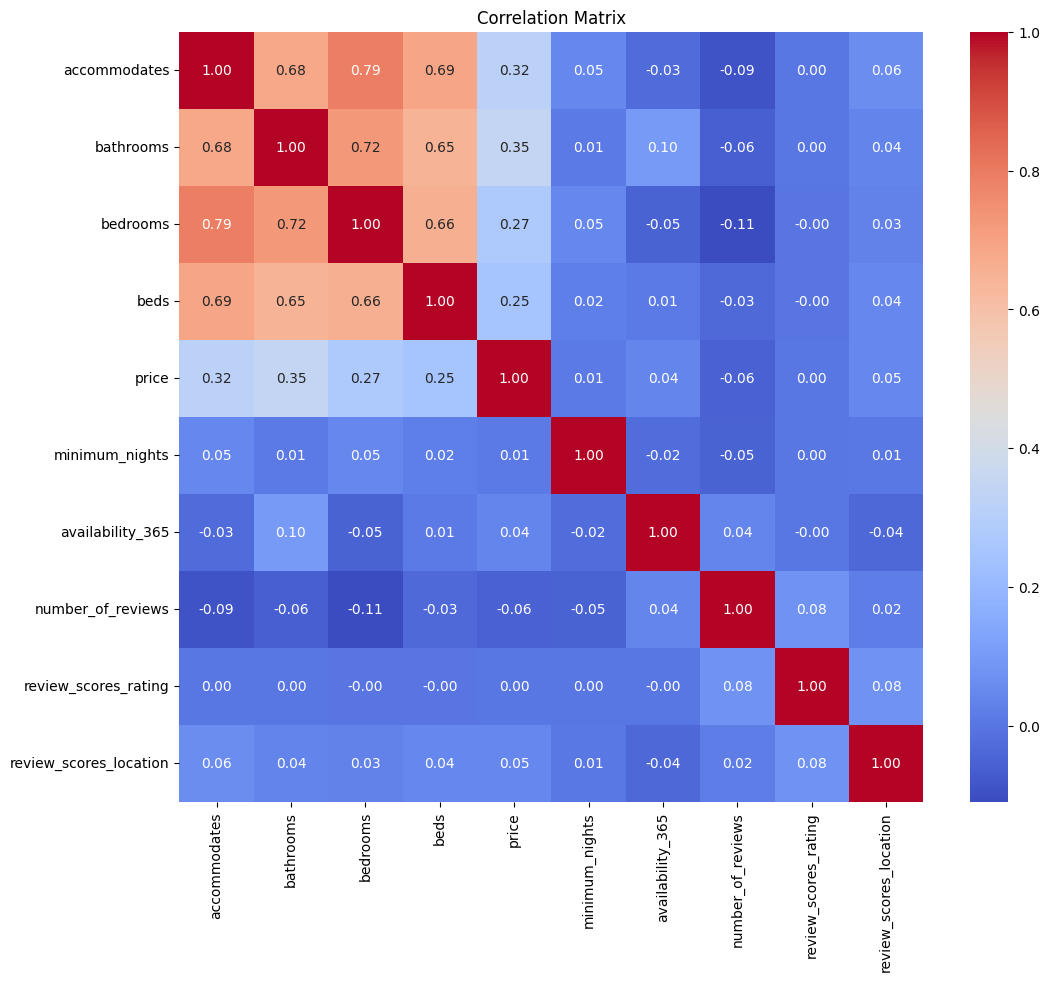

In [ ]:
# Drop the 'id' column if it exists
selected_data_without_id = selected_data.drop(columns=['id'], errors='ignore')

# Select only numerical columns for correlation calculation
numerical_columns = selected_data_without_id.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = selected_data_without_id[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Format annotation to 2 decimal places
plt.title('Correlation Matrix')
plt.show()

## Proposed Research Questions



1.   What are the key factors that influence the pricing of listings on AirBnB Cape Town? <br>**Variables:** price, accommodates, bedrooms, bathrooms, room_type, amenities, host_is_superhost, review_scores_rating<br> **Analysis Type:** Regression Modeling<br><br>

2.    Does the pricing of Airbnb listings vary across neighbourhoods in Cape Town? <br>**Variables:** price, neighbourhood<br> **Analysis Type:** Group Comparison<br><br>

3.  What are the factors that influence the rating of an Airbnb listing in Cape Town?<br>**Variables:** review_scores_rating, review_scores_location, accommodates, bedrooms, bathrooms, amenities, host_is_superhost, host_response_rate, host_response_time<br> **Analysis Type:** Regression Modeling<br>  




## Conclusion

The cleaning and wrangling process involved imputing missing values and dropping highly missing value columns. The price data were also cleaned to be in numerical representation.

From the exploratory data analysis, the listings are usually set to accommodate about 3-4 guests, having 1-2 bedrooms and 2 beds in Cape Town. The prices in the data were highly skewed, indicating listings with quite a few very high prices. In general, larger listings with more rooms and amenities command higher prices. Minimum stay requirements and availability are weakly correlated with other variables like price and accommodation size. The review scores were also weakly correlated with other features, suggesting that guest ratings might have less influence on pricing listing.

Some interesting trends and anomalies were found during the exploration. A few listings have very high prices, which could be luxury properties or errors in data entry that need to be investigated. The room type was identified to have a major influence on listing price, with entire homes or apartments being the most expensive. Additionally, some listings with more reviews typically had high pricing, indicating a possible relationship between popularity and pricing that merits greater investigation.

These results lead to several avenues for further analysis. One possible investigation could be price differences between neighbourhoods to find the price trend for a particular neighbourhood. Regression models on the key factors affecting price and review scores may give an idea of how the dynamics in the Cape Town Airbnb market are working. Price predictive models can be made, listing features along with characteristics of hosts to let hosts further work toward optimizing their pricing strategy. Finally, analyzing reviews made by guests with sentiment analysis could expose many hidden facts regarding the satisfaction and preferences of guests, offering great value for both hosts and the platform itself, Airbnb.


## References

 https://insideairbnb.com/about/

 https://pandas.pydata.org/docs/index.html

 https://seaborn.pydata.org/tutorial.html

 https://numpy.org/doc/stable/user/absolute_beginners.html

 https://matplotlib.org/stable/users/explain/quick_start.html